# ***A neural network designed for handwriting recognition uses deep learning to analyze and interpret handwritten text, converting it into digital form accurately and efficiently!!***

Step 1: Importing all necessary libraries for our Project

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

from warnings import filterwarnings
filterwarnings(action='ignore')

Step 2: Now we have to load the Dataset into the Notebook

In [9]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Step 3: Plotting the data with MatPlotLib

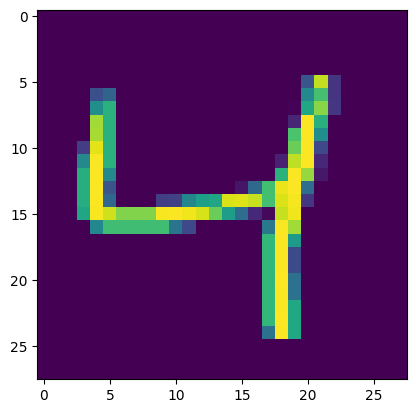

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

Step 4: Training the Datsets

In [15]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

# **MODEL1: SEQUENTIAL MODEL**

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.9180 - val_loss: 0.1610 - val_accuracy: 0.9523
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1246 - accuracy: 0.9633 - val_loss: 0.1147 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.1065 - val_accuracy: 0.9669
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0909 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0932 - val_accuracy: 0.9719
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0387 - accuracy: 0.9873 - val_loss: 0.1061 - val_accuracy: 0.9705
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.1180 - val_accuracy:

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

Step 5: Plotting the accuracy score of the Sequential model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

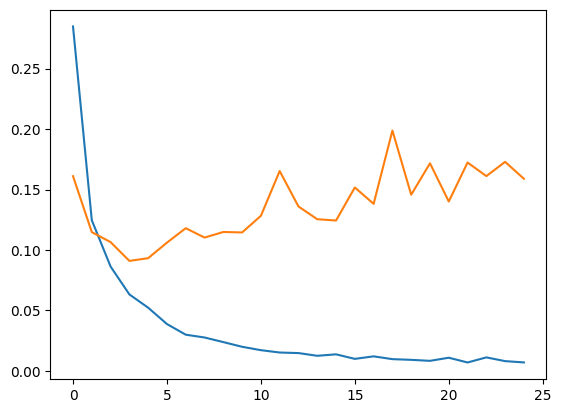

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

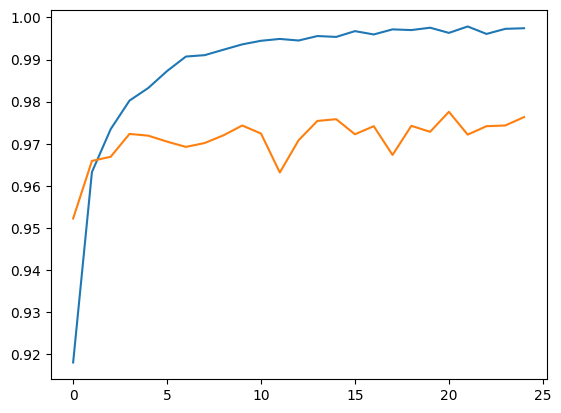

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

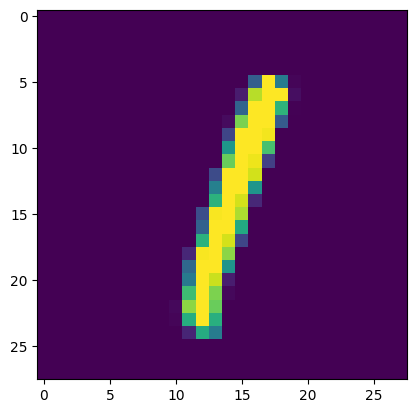

In [29]:
plt.imshow(X_test[5])

In [30]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([2])